## **About Dataset**
Data source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data?select=Clean_Dataset.csv

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. This dataset is a modified result that combines the files 'economy.csv' and 'business.csv' available on the website page. The modification includes the addition of columns for date and holidays.

Description:
* `Date`: The date when tickets are available
* `Airline:` The name of the airline company is stored in the airline column. It is a categorical feature having 8 different airlines.
* `Flight:` Flight stores information regarding the plane's flight code. It is a categorical feature.
* `Source City:` City from which the flight takes off. It is a categorical feature having 6 unique cities.
* `Departure Time:` This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* `Stop:` A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* `Arrival Time:` This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* `Destination City:` City where the flight will land. It is a categorical feature having 6 unique cities.
* `Class:` A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* `Duration:` A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* `Days Left:` This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* `Price:` Target variable stores information of the ticket price.

## **Required Libraries**

In [2]:
import joblib
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from jcopml.tuning import grid_search_params as gsp, random_search_params as rsp

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
# Warnings
import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')
sns.set_style("whitegrid")

In [4]:
# Models Library
# ================  Non-Linear Regressor  ==========================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
# ================= Non-Linear Regressor  ==========================
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

## **Import the Data**

In [5]:
df = pd.read_csv('Dataset_Outliers_Cleaned.csv')
df.drop(['index'], axis=1, inplace=True)
print('Duplicates:', df[df.duplicated()].shape)
df = df[~df.duplicated()]
print('Data shape:', df.shape)
df.head()

Duplicates: (0, 35)
Data shape: (295707, 35)


,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0.0,0,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# Define features and target
x = df.drop(['price'], axis=1)
y = df['price']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## **Modelling**

In [9]:
def train_eval_visualize_model(model, model_name):
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    if model_name == 'lr':
        model_name_title = 'Linear Regression'  
    else:
        model_name_title = 'Random Forest'

    # Visualize the prediction
    plt.figure()
    plt.scatter(y_test_pred, y_test, c='#B44646', label="Test")
    plt.scatter(y_train_pred, y_train, c='#4682B4', label="Training")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
    plt.legend(loc='upper left')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    
    plt.title(f'{model_name_title}')
    plt.show()

    # Print metrics
    print(f"{model_name_title} - Test Set Evaluation Metrics:")
    print(f"MAPE: {mape_test}")
    print(f"MAE : {mae_test}")
    print(f"MSE : {mse_test}")
    print(f"RMSE: {rmse_test}")
    print(f"R^2 : {r2_test}\n")

    # Save the model
    joblib.dump(model, f'model_{model_name}.joblib')

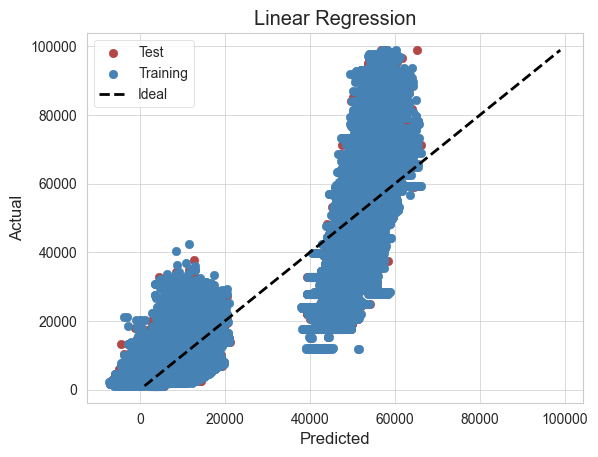

Linear Regression - Test Set Evaluation Metrics:
MAPE: 0.4273039535752194
MAE : 4491.250836968652
MSE : 45385944.53009705
RMSE: 6736.909122891377
R^2 : 0.911999518841925



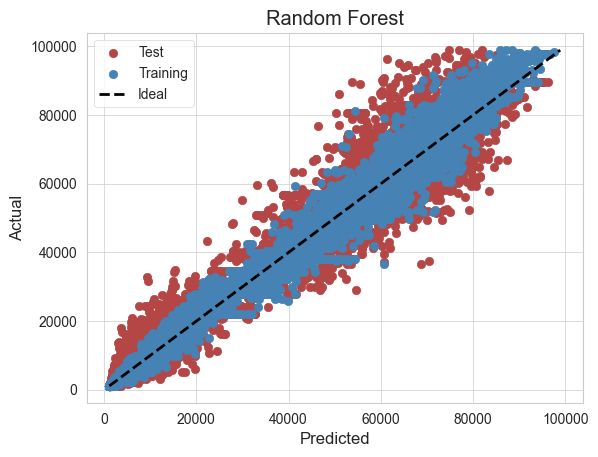

Random Forest - Test Set Evaluation Metrics:
MAPE: 0.0693728388329376
MAE : 1061.604834289192
MSE : 7181255.89594978
RMSE: 2679.7865392508
R^2 : 0.9860759981816888



In [10]:
# Define your models and their names
models = [LinearRegression(), 
          RandomForestRegressor()]
model_names = ['lr', 'rf']

# Train, evaluate and visualize each model
for model, model_name in zip(models, model_names):
    train_eval_visualize_model(model, model_name)

**Improving Linear Model Using Polynomial Feature**

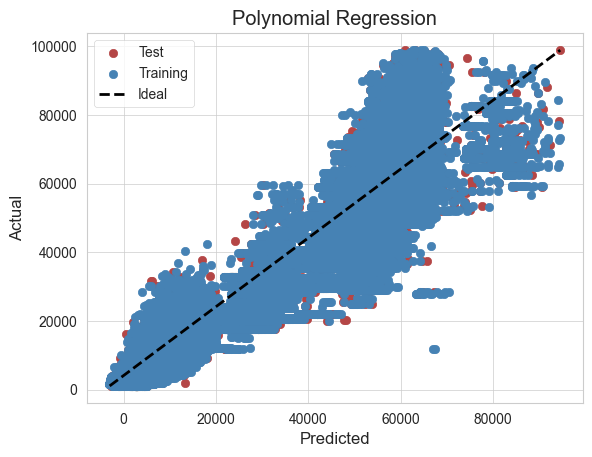

Polynomial Regression - Test Set Evaluation Metrics:
MAPE: 0.27510767772083483
MAE : 3241.923668402822
MSE : 25174601.23649473
RMSE: 5017.429744051702
R^2 : 0.9511880375144531


['poly_model.joblib']

In [11]:
model = LinearRegression()

# Define features and target
x = df.drop(['price'], axis=1)
y = df['price']

# Transform to polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
    
# Train the model
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate metrics
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Visualize the prediction
plt.figure()
plt.scatter(y_test_pred, y_test, c='#B44646', label="Test")
plt.scatter(y_train_pred, y_train, c='#4682B4', label="Training")
plt.plot([min(y_test_pred), max(y_test_pred)], [min(y_test), max(y_test)], 'k--', lw=2, label="Ideal")
plt.legend(loc='upper left')
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.title('Polynomial Regression')
plt.show()

# Print metrics
print("Polynomial Regression - Test Set Evaluation Metrics:")
print(f"MAPE: {mape_test}")
print(f"MAE : {mae_test}")
print(f"MSE : {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 : {r2_test}")

# Save the model
joblib.dump(model, 'poly_model.joblib')

# # Polynomial Regression - Test Set Evaluation Metrics:
# # MAPE: 0.27510767772083483
# # MAE : 3241.923668402822
# # MSE : 25174601.23649473
# # RMSE: 5017.429744051702
# # R^2 : 0.9511880375144531

**Hyperparameter Tuning Random Forest**

In [12]:
# # RF Tuned
# rf_params = {
#     'max_depth': 50, 
#     'max_features': 0.8, 
#     'min_samples_leaf': 1, 
#     'n_estimators': 300,
#     'random_state': 42,
#     'n_jobs': -1
# }

In [12]:
# Hyperparameter Tuning Random Forest
# rf_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

rf_params = {
    'max_depth': [40, 60, 80],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [400, 500, 600],
    'random_state': [42],
    'n_jobs': [-1]
}

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)
print('Best Params:', grid_search.best_params_)

# # Best - 1
# # Best Params: {'max_depth': 50, 'max_features': 1.0, 'min_samples_leaf': 5, 'n_estimators': 400}

# # Best - 2
# # Best Params: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

# # Best - 3
# # Best Params: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400, 'n_jobs': -1, 'random_state': 42}

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400, 'n_jobs': -1, 'random_state': 42}


In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=5,
                      n_estimators=300)

In [ ]:
score = grid_search.best_score_
score

In [13]:
rf_params = {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400, 'n_jobs': -1, 'random_state': 42}

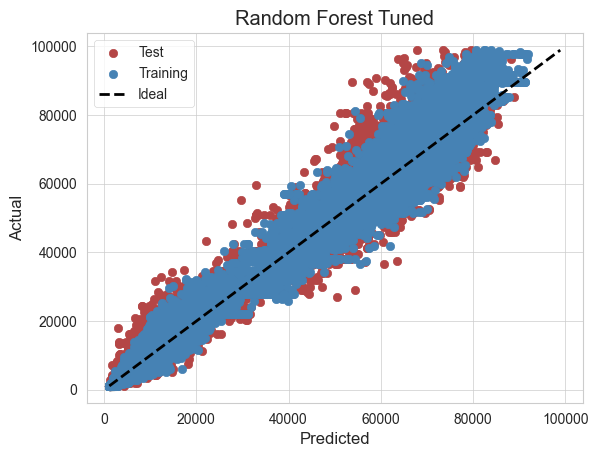

Random Forest Tuned - Test Set Evaluation Metrics:
MAPE: 0.08441196686367704
MAE : 1233.5837248073062
MSE : 7213933.660487038
RMSE: 2685.8767023984997
R^2 : 0.9860126380592495



['model_rf.joblib']

In [15]:
# Define features and target
x = df.drop(['price'], axis=1)
y = df['price']

# Scaling the data
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Select model
model = RandomForestRegressor(**rf_params)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
# Train the model
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate metrics
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Visualize the prediction
plt.figure()
plt.scatter(y_test_pred, y_test, c='#B44646', label="Test")
plt.scatter(y_train_pred, y_train, c='#4682B4', label="Training")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.legend(loc='upper left')
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.title(f'Random Forest Tuned')
plt.show()

# Print metrics
print(f"Random Forest Tuned - Test Set Evaluation Metrics:")
print(f"MAPE: {mape_test}")
print(f"MAE : {mae_test}")
print(f"MSE : {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 : {r2_test}\n")

# Save the model
joblib.dump(model, f'model_rf.joblib')

# # Random Forest - Test Set Evaluation Metrics:
# # MAPE: 0.06944684577735116
# # MAE : 1062.631557383212
# # MSE : 7185340.60485705
# # RMSE: 2680.5485641668665
# # R^2 : 0.9860680781889917

## **Predict Data**

In [27]:
# Import dataset
df_baru = pd.read_csv('Dataset_Outliers_Cleaned.csv')
print('Duplicates:', df_baru[df_baru.duplicated()].shape)
df_baru = df_baru[~df_baru.duplicated()]
print('Data shape:', df_baru.shape)
df_baru.head()

Duplicates: (0, 36)
Data shape: (295707, 36)


,index,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0.0,0,2.17,1,5953,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0,2.33,1,5953,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0,2.17,1,5956,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,0,2.25,1,5955,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0,2.33,1,5955,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Load models
rf_model = joblib.load('model_rf.joblib')
lr_model = joblib.load('model_lr.joblib')
poly_model = joblib.load('lr_exp_model.joblib')

In [29]:
# Import original dataset
df_ori = pd.read_csv('Clean_Dataset.csv')

# # ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']

In [30]:
# Define scaler
scaler = MinMaxScaler()

**Linear Regression**

In [31]:
# Define features and target
x_ = df_baru.drop(['index', 'price'], axis=1)
y_ = df_baru['price']

# Scale the features
x_ = scaler.fit_transform(x_)

# Create new dataframe to store the predictions
y_baru = pd.DataFrame()
y_predict_new = lr_model.predict(x_)
y_baru['predicted price'] = y_predict_new

# Calculate the evaluation metrics
mae_test = mean_absolute_error(y_, y_predict_new)
mse_test = mean_squared_error(y_, y_predict_new)
rmse_test = np.sqrt(mean_squared_error(y_, y_predict_new))
mape_test = mean_absolute_percentage_error(y_, y_predict_new)
r2_test = r2_score(y_, y_predict_new)

print("Linear Regression - Test Set Evaluation Metrics:")
print(f"MAPE: {mape_test}")
print(f"MSE : {mse_test}")
print(f"MAE : {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 : {r2_test}")

# # Linear Regression - Test Set Evaluation Metrics:
# # MAPE: 0.427453963351019
# # MSE : 45744388.39367685
# # MAE : 4507.428295576365
# # RMSE: 6763.45979463742
# # R^2 : 0.9112951325252221

Linear Regression - Test Set Evaluation Metrics:
MAPE: 0.427453963351019
MSE : 45744388.39367685
MAE : 4507.428295576365
RMSE: 6763.45979463742
R^2 : 0.9112951325252221


In [32]:
df_combined = pd.merge(df_baru, y_baru[['predicted price']], how='left', left_index=True, right_index=True)
print('Data shape:', df_combined.shape)
df_combined.tail()

Data shape: (295707, 37)


,index,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,predicted price
295702,300148,1.0,1,10.08,49,69265,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50348.0
295703,300149,1.0,1,10.42,49,77105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49730.0
295704,300150,1.0,1,13.83,49,79099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50722.0
295705,300151,1.0,1,10.00,49,81585,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50276.0
295706,300152,1.0,1,10.08,49,81585,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50350.0


In [33]:
# Combine prediction result to new dataframe
df_combined = pd.merge(df_combined[['predicted price', 'index']], df_ori, how='left', left_on='index', right_on='Unnamed: 0')
df_combined_lr = df_combined[['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', \
    'class', 'duration', 'days_left', 'price', 'predicted price']]
df_combined_lr['model'] = 'Linear Regression'

**Polynomial Regression**

In [34]:
# Define features and target
x_ = df_baru.drop(['index', 'price'], axis=1)
y_ = df_baru['price']

# Scale the features
x_ = poly.fit_transform(x_)

# Create new dataframe to store the predictions
y_baru = pd.DataFrame()
y_predict_new = poly_model.predict(x_)
y_baru['predicted price'] = y_predict_new

# Calculate the evaluation metrics
mae_test = mean_absolute_error(y_, y_predict_new)
mse_test = mean_squared_error(y_, y_predict_new)
rmse_test = np.sqrt(mean_squared_error(y_, y_predict_new))
mape_test = mean_absolute_percentage_error(y_, y_predict_new)
r2_test = r2_score(y_, y_predict_new)

print("Polynomial Regression - Test Set Evaluation Metrics:")
print(f"MAPE: {mape_test}")
print(f"MSE : {mse_test}")
print(f"MAE : {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 : {r2_test}")

# # Polynomial Regression - Test Set Evaluation Metrics:
# # MAPE: 0.27540914834104185
# # MSE : 25276110.73467101
# # MAE : 3252.84969611924
# # RMSE: 5027.535254443375
# # R^2 : 0.9509860305989636

Polynomial Regression - Test Set Evaluation Metrics:
MAPE: 0.27540914834104185
MSE : 25276110.73467101
MAE : 3252.84969611924
RMSE: 5027.535254443375
R^2 : 0.9509860305989636


In [35]:
df_combined = pd.merge(df_baru, y_baru[['predicted price']], how='left', left_index=True, right_index=True)
print('Data shape:', df_combined.shape)
df_combined.tail()

Data shape: (295707, 37)


,index,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,predicted price
295702,300148,1.0,1,10.08,49,69265,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56198.799316
295703,300149,1.0,1,10.42,49,77105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53658.914551
295704,300150,1.0,1,13.83,49,79099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54275.867676
295705,300151,1.0,1,10.00,49,81585,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55026.799316
295706,300152,1.0,1,10.08,49,81585,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56198.799316


In [36]:
# Combine prediction result to new dataframe
df_combined = pd.merge(df_combined[['predicted price', 'index']], df_ori, how='left', left_on='index', right_on='Unnamed: 0')
df_combined_poly = df_combined[['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', \
    'class', 'duration', 'days_left', 'price', 'predicted price']]
df_combined_poly['model'] = 'Polynomial Regression'

In [37]:
# Combine both models
df_combined = pd.concat([df_combined_lr, df_combined_poly], axis=0)
print('Data shape:', df_combined.shape)
df_combined_1 = df_combined.copy()
df_combined.tail()

Data shape: (591414, 13)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,predicted price,model
295702,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,56198.799316,Polynomial Regression
295703,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,53658.914551,Polynomial Regression
295704,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,54275.867676,Polynomial Regression
295705,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,55026.799316,Polynomial Regression
295706,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585,56198.799316,Polynomial Regression


**Random Forest**

In [38]:
# Define features and target
x_ = df_baru.drop(['index', 'price'], axis=1)
y_ = df_baru['price']

# Scale the features
x_ = scaler.fit_transform(x_)

# Create new dataframe to store the predictions
y_baru = pd.DataFrame()
y_predict_new = rf_model.predict(x_)
y_baru['predicted price'] = y_predict_new

# Calculate the evaluation metrics
mae_test = mean_absolute_error(y_, y_predict_new)
mse_test = mean_squared_error(y_, y_predict_new)
rmse_test = np.sqrt(mean_squared_error(y_, y_predict_new))
mape_test = mean_absolute_percentage_error(y_, y_predict_new)
r2_test = r2_score(y_, y_predict_new)

print("Linear Regression - Test Set Evaluation Metrics:")
print(f"MAPE: {mape_test}")
print(f"MSE : {mse_test}")
print(f"MAE : {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 : {r2_test}")

# # Linear Regression - Test Set Evaluation Metrics:
# # MAPE: 0.03534998518054447
# # MSE : 2441315.3952032747
# # MAE : 548.456488456417
# # RMSE: 1562.4709261945563
# # R^2 : 0.995265942639085

Linear Regression - Test Set Evaluation Metrics:
MAPE: 0.0670991040363301
MSE : 5127153.1692240825
MAE : 985.3476001828973
RMSE: 2264.321790122615
R^2 : 0.9900577216491592


In [39]:
df_combined = pd.merge(df_baru, y_baru[['predicted price']], how='left', left_index=True, right_index=True)
print('Data shape:', df_combined.shape)
df_combined.tail()

Data shape: (295707, 37)


,index,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,predicted price
295702,300148,1.0,1,10.08,49,69265,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,73971.210083
295703,300149,1.0,1,10.42,49,77105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68018.170896
295704,300150,1.0,1,13.83,49,79099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61259.614572
295705,300151,1.0,1,10.00,49,81585,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,71486.963368
295706,300152,1.0,1,10.08,49,81585,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,73971.210083


In [40]:
# Combine prediction result to new dataframe
df_combined = pd.merge(df_combined[['predicted price', 'index']], df_ori, how='left', left_on='index', right_on='Unnamed: 0')
df_combined_rf = df_combined[['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', \
    'class', 'duration', 'days_left', 'price', 'predicted price']]
df_combined_rf['model'] = 'Random Forest'

**Export Results**

In [41]:
# Combine both models
df_combined = pd.concat([df_combined_1, df_combined_rf], axis=0)
print('Data shape:', df_combined.shape)
df_combined.tail()

Data shape: (887121, 13)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,predicted price,model
295702,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,73971.210083,Random Forest
295703,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,68018.170896,Random Forest
295704,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,61259.614572,Random Forest
295705,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,71486.963368,Random Forest
295706,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585,73971.210083,Random Forest


In [42]:
# df_combined.to_csv('Prediction Results.csv', index=False)